In [8]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dados = pd.read_csv('cont_hidro_cloro_data.csv',sep=';')

In [6]:
dados.head()

,Data,Palavra,Ocorrencias
0,2020-04-11,cloroquina,11520
1,2020-04-11,hidroxicloroquina,3486
2,2020-04-12,cloroquina,65272
3,2020-04-12,hidroxicloroquina,14723
4,2020-04-13,cloroquina,45901


In [21]:
tts_data,tts_total =({'2020-04-11': 260502,
  '2020-04-12': 1316303,
  '2020-04-13': 1157405,
  '2020-04-14': 1361567,
  '2020-04-15': 1396492,
  '2020-04-16': 383271,
  '2020-04-22': 832755,
  '2020-04-23': 280609},
 6988904)

In [66]:
cont = 0
Ocorr_Relativa = []
for num in  dados.Ocorrencias:
    Ocorr_Relativa.append(num/tts_data[dados.Data[0]])
    cont += 1
dados['Ocorr_Relativa'] = Ocorr_Relativa

In [101]:
fig = px.line(dados,x=dados['Data'],y=dados['Ocorr_Relativa'], color = 'Palavra')

In [102]:
fig.show()

In [83]:
fig = px.bar(dados,x='Data',y='Ocorr_Relativa',color='Palavra')

In [84]:
fig.show()

In [97]:
index = []
for i in dados.Palavra[:2].values:
    i_t = i
    index.append(i_t)
index
new = pd.DataFrame(index=index,columns=dados.Data[::2].values)
df = dados.set_index(['Data','Palavra']).T.copy()
df[('2020-04-11', 'cloroquina')]
for data_palavra in df.columns:
    new[data_palavra[0]][data_palavra[1]] = df[data_palavra]['Ocorr_Relativa']
new # Visualização dos Dados após Reestruturação

,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-22,2020-04-23
cloroquina,0.0442223,0.250562,0.176202,0.248063,0.240939,0.0946365,0.0574007,0.0321533
hidroxicloroquina,0.0133819,0.0565178,0.053347,0.0957037,0.0615811,0.0189365,0.039136,0.0212014


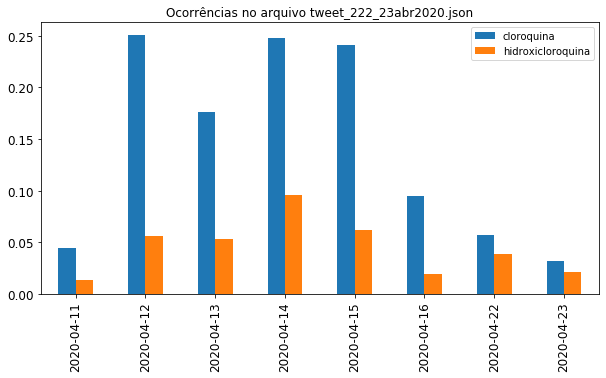

In [99]:
grafico_barras = new.T.plot( kind='bar', title ="Ocorrências no arquivo tweet_222_23abr2020.json",figsize=(10,5),legend=True, fontsize=12)

plt.show()

### Aplicando código de um estudo de caso

In [135]:
#Importando o Plotly
#Gráfico de dispersão

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

readPath = 'kc_house_data.csv' 

df = pd.read_csv(readPath, sep = ",")

#O objeto dos graficos é criado com a função "go.Scatter()" e deve ser armazenado em uma variável

trace = go.Scatter(x = df['yr_built'],
                   y = df['price'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8)   #-> o parametro 'mode' determina como os pontos são representados no gráfico

data = [trace]

# Criando Layout
layout = go.Layout(title='Preços por ano de construção',
                   yaxis={'title':'Preço da casa'},
                   xaxis={'title': 'Ano de construção'})
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)

In [133]:
# Gerando gráficos para casas que tem 1 quarto
trace1 = go.Box(y = df.loc[df['bedrooms'] == 1, 'price'],
                name = 'Casas com 1 quarto',
                marker = {'color': '#f39c12'})
# Gráfico de caixa para casas com 2 quartos
trace2 = go.Box(y = df.loc[df['bedrooms'] == 2, 'price'],
                name = 'Casas com 2 quartos',
                marker = {'color': '#e67e22'})
# Gráfico de caixa para casas com 3 quartos
trace3 = go.Box(y = df.loc[df['bedrooms'] == 3, 'price'],
                name = 'Casas com 3 quartos',
                marker = {'color': '#d35400'})
# Gráfico para casas de quatro quartos
trace4 = go.Box(y = df.loc[df['bedrooms'] == 4, 'price'],
                name = 'Casas com 4 quartos',
                marker = {'color': '#e74c3c'})
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(title = 'Dispersão de preços para casas com diferentes quartos',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Número de quartos'},
                   yaxis = {'title': 'Preço'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [142]:
# Gráfico usando apenas marcadores
trace1 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [1, 2, 3, 4, 5],
                    mode = 'markers',
                    name = 'Apenas marcadores')
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [11, 12, 13, 14, 15],
                    mode = 'lines',
                    name = 'Apenas linhas')
# Criando gráfico com marcadores e linhas
trace3 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [6, 7, 8, 9, 10],
                    mode = 'markers+lines',
                    name = 'Marcadores e Linhas',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
trace4 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [10, 9, 11, 8, 12],
                    mode = 'lines',
                    name = 'Gráfico com linhas tracejadas',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
data = [trace1, trace2, trace3,trace4]
py.iplot(data)

In [141]:
trace1 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [10, 20, 30],
                name = 'Gráfico 1',
                marker = {'color': '#feca57'})
trace2 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [20, 30, 40],
                name = 'Gráfico 2',
                marker = {'color': '#ff9f43'})
data = [trace1, trace2]
layout = go.Layout(title = 'Gráfico de barras do <a href=\'https://plot.ly/\'>Plotly</a>',
                   xaxis = {'title': 'Nome da fruta'},
                   yaxis = {'title': 'Quantidade'},
                   barmode = 'stack')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)